In [76]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

In [77]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, accuracy_score, classification_report

In [78]:
file_path = r'C:\Users\TOW Admin\Downloads\Side gig\Project 7\Codes&Data\WA_Fn-UseC_-Telco-Customer-Churn.csv'

df = pd.read_csv(file_path)

df

,S/N,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,2,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,4,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,5,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,7039,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,7040,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,7041,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,7042,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [79]:
df.columns.values

array(['S/N', 'customerID', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'], dtype=object)

<a id = "7" ></a>
# <span style="font-family:serif; font-size:28px;"> 4. Visualize missing values </span>
<a id = "missingvalue" ></a>

<Axes: >

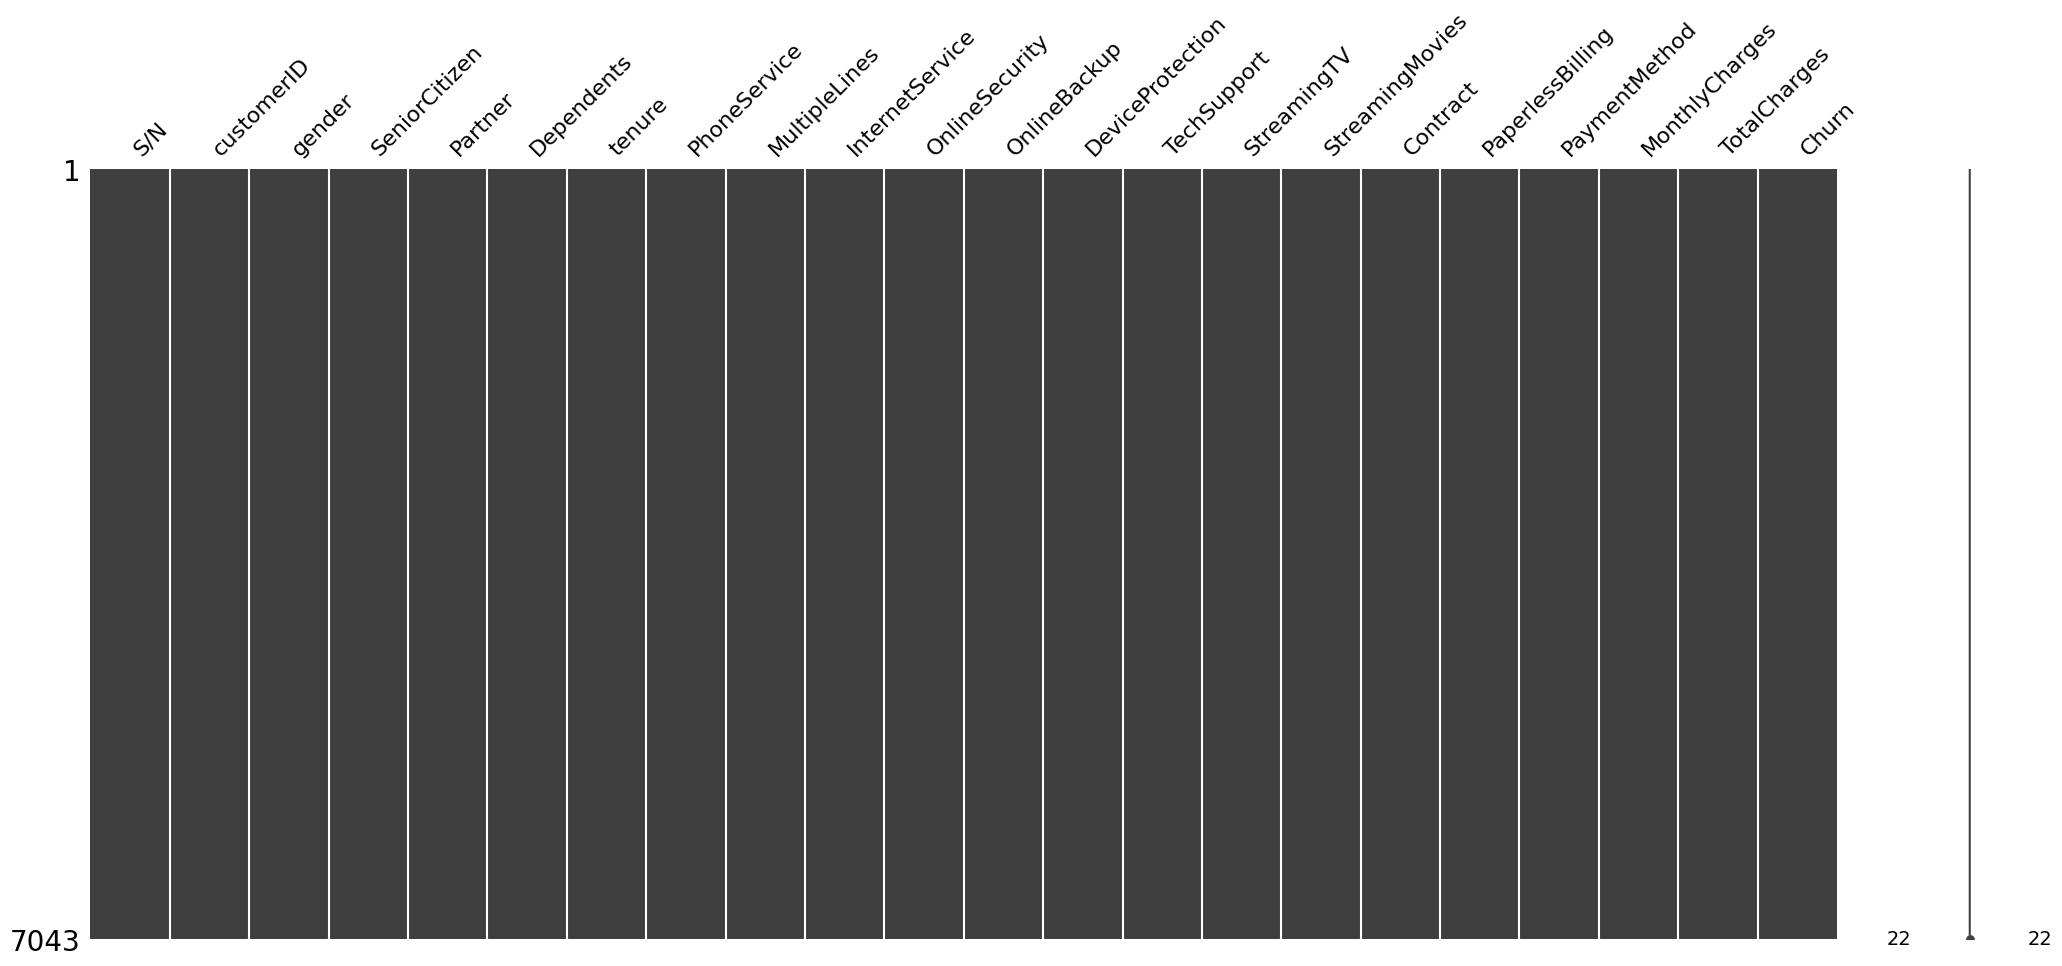

In [80]:
# Visualize missing values as a matrix
msno.matrix(df)

- No missing values found, get it by using matrix (msno)

In [81]:
df["InternetService"].describe()

count            7043
unique              3
top       Fiber optic
freq             3096
Name: InternetService, dtype: object

In [82]:
df["InternetService"].describe(include=['object','bool'])

count            7043
unique              3
top       Fiber optic
freq             3096
Name: InternetService, dtype: object

#### 8.1 Categorical Encoding

In [83]:
# Categorical Encoding
def object_to_int(dataframe_series):
    if dataframe_series.dtype=='object':
        dataframe_series = LabelEncoder().fit_transform(dataframe_series)
    return dataframe_series

In [84]:
    df = df.apply(lambda x: object_to_int(x))
    df.head()

,S/N,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,5375,0,0,1,0,1,0,1,0,...,0,0,0,0,0,1,2,29.85,2505,0
1,2,3962,1,0,0,0,34,1,0,0,...,2,0,0,0,1,0,3,56.95,1466,0
2,3,2564,1,0,0,0,2,1,0,0,...,0,0,0,0,0,1,3,53.85,157,1
3,4,5535,1,0,0,0,45,0,1,0,...,2,2,0,0,1,0,0,42.30,1400,0
4,5,6511,0,0,0,0,2,1,0,1,...,0,0,0,0,0,1,2,70.70,925,1


In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   S/N               7043 non-null   int64  
 1   customerID        7043 non-null   int32  
 2   gender            7043 non-null   int32  
 3   SeniorCitizen     7043 non-null   int64  
 4   Partner           7043 non-null   int32  
 5   Dependents        7043 non-null   int32  
 6   tenure            7043 non-null   int64  
 7   PhoneService      7043 non-null   int32  
 8   MultipleLines     7043 non-null   int32  
 9   InternetService   7043 non-null   int32  
 10  OnlineSecurity    7043 non-null   int32  
 11  OnlineBackup      7043 non-null   int32  
 12  DeviceProtection  7043 non-null   int32  
 13  TechSupport       7043 non-null   int32  
 14  StreamingTV       7043 non-null   int32  
 15  StreamingMovies   7043 non-null   int32  
 16  Contract          7043 non-null   int32  


#### 8.2 Correlation Checking

In [86]:
# Checking Features corr with target (Churn)
df.corr()['Churn'].sort_values(ascending=False)

Churn               1.000000
MonthlyCharges      0.193356
PaperlessBilling    0.191825
SeniorCitizen       0.150889
PaymentMethod       0.107062
MultipleLines       0.038037
TotalCharges        0.014479
PhoneService        0.011942
S/N                 0.010286
gender             -0.008612
customerID         -0.017447
StreamingTV        -0.036581
StreamingMovies    -0.038492
InternetService    -0.047291
Partner            -0.150448
Dependents         -0.164221
DeviceProtection   -0.178134
OnlineBackup       -0.195525
TechSupport        -0.282492
OnlineSecurity     -0.289309
tenure             -0.352229
Contract           -0.396713
Name: Churn, dtype: float64

* Mothly Charges & Paperless billing having comperative max correlation

#### 8.3 Splitting Data & Training

In [87]:
X = df.drop(columns=['Churn']) # Features
y = df['Churn'].values         # Target

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=40, stratify=y)

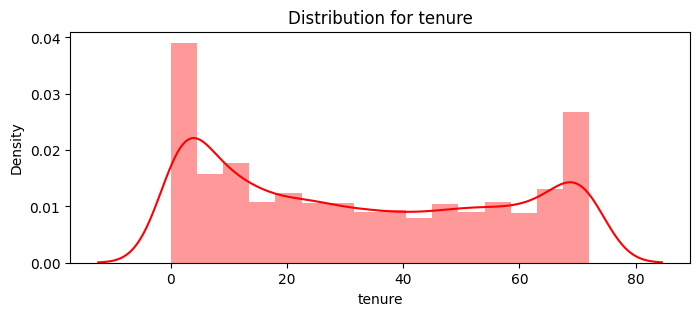

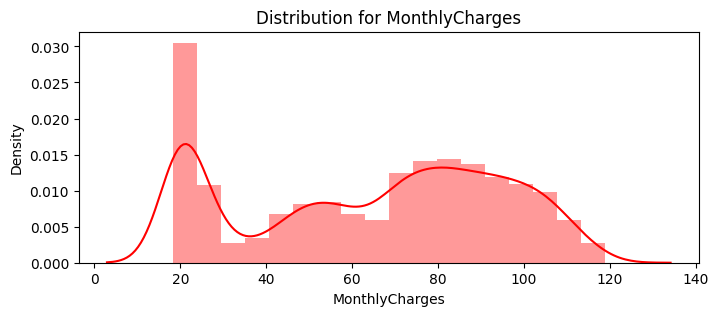

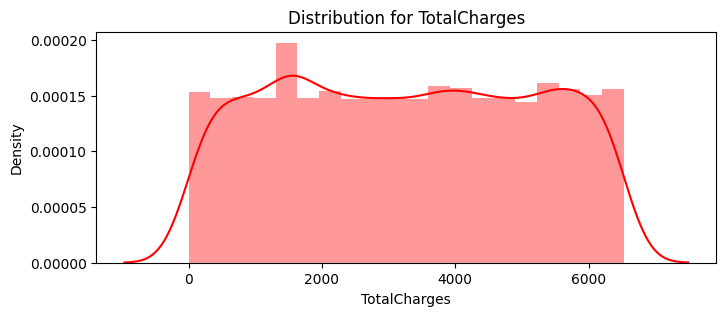

In [89]:
def distplot(feature, frame, color='r'):
    plt.figure(figsize=(8,3))
    plt.title("Distribution for {}".format(feature))
    ax = sns.distplot(frame[feature], color= color)
    
num_cols = ["tenure", 'MonthlyCharges', 'TotalCharges']
for feat in num_cols: distplot(feat, df)

Since the numerical features are distributed over different value ranges, I will use standard scalar to scale them down to the same range. 

#### 8.5 Columns Categorization for different purpose ( Standardization, Label  & One Hot Encoding)

In [90]:
cat_cols_ohe = ['PaymentMethod','Contract','InternetService']             # For those one-hot encoding considered to be useful
cat_cols_le = list(set(X_train.columns)- set(num_cols)-set(cat_cols_ohe)) # For those Label encoding considered to be useful

In [91]:
scaler= StandardScaler()

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.fit_transform(X_test[num_cols])

<a id = "12" ></a>
# <span style="font-family:serif; font-size:28px;"> 9. Model Evaluation and Predictions </span>
<a id = "12" ></a>

<a id="101"></a>
#### <b> 1. KNN </b>
<a id="KNN"></a>

In [92]:
import sklearn
import numpy

In [93]:
knn_model = KNeighborsClassifier(n_neighbors=11)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)
accuracy_knn = knn_model.score(X_test, y_test)
print("KNN Accuracy:", accuracy_knn)

KNN Accuracy: 0.7117841930903928


In [94]:
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.73      0.96      0.83      1552
           1       0.23      0.04      0.06       561

    accuracy                           0.71      2113
   macro avg       0.48      0.50      0.45      2113
weighted avg       0.60      0.71      0.63      2113



AUC for KNN Classifier: 0.4965876931841153


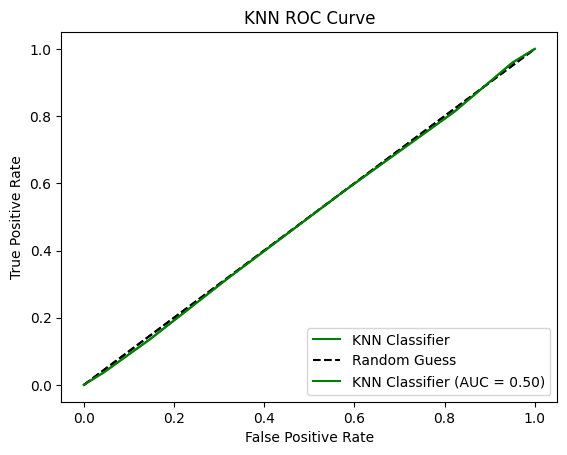

In [95]:
y_pred_prob_knn = knn_model.predict_proba(X_test)[:,1]
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, y_pred_prob_knn)

plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_knn, tpr_knn, label='KNN Classifier', color='g')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('KNN ROC Curve', fontsize=12)
plt.legend()

auc_knn = roc_auc_score(y_test, y_pred_prob_knn)
print(f'AUC for KNN Classifier: {auc_knn}')

plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.plot(fpr_knn, tpr_knn, label=f'KNN Classifier (AUC = {auc_knn:.2f})', color='g')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('KNN ROC Curve', fontsize=12)
plt.legend(loc='lower right')
plt.show()


<a id="102"></a>
#### <b> 2. SVC </b>
<a id="SVC"></a>

In [96]:
svc_model = SVC(random_state=1)
svc_model.fit(X_train, y_train)
y_pred_svc = svc_model.predict(X_test)
accuracy_svc = svc_model.score(X_test, y_test)
print("SVM Accuracy is :", accuracy_svc)

SVM Accuracy is : 0.73450070989115


In [97]:
print(classification_report(y_test, y_pred_svc))

              precision    recall  f1-score   support

           0       0.73      1.00      0.85      1552
           1       0.00      0.00      0.00       561

    accuracy                           0.73      2113
   macro avg       0.37      0.50      0.42      2113
weighted avg       0.54      0.73      0.62      2113



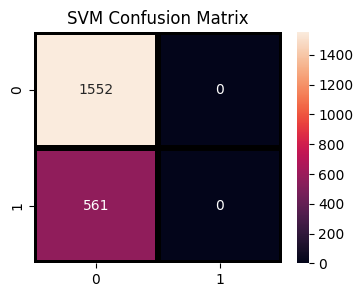

In [98]:
# Confusion Matrix
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, y_pred_svc),
           annot=True, fmt="d", linecolor="k", linewidths=3
           )
plt.title("SVM Confusion Matrix", fontsize=12)
plt.show()

AUC for SVM Classifier: 0.6742952569968944


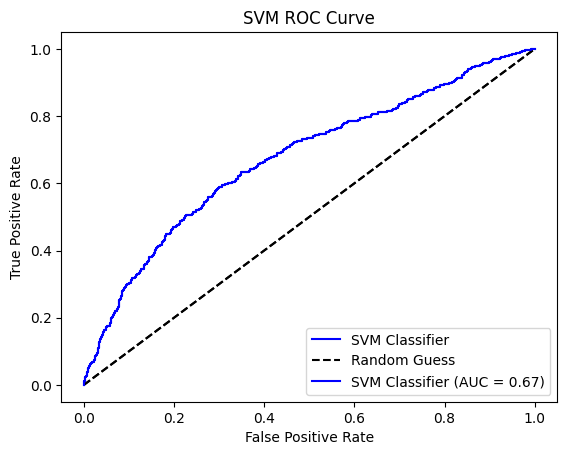

In [99]:
svm_model = SVC(probability=True)
svm_model.fit(X_train, y_train)  

y_pred_prob_svm = svm_model.predict_proba(X_test)[:, 1]

fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_test, y_pred_prob_svm)

plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_svm, tpr_svm, label='SVM Classifier', color='b')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('SVM ROC Curve', fontsize=12)
plt.legend(loc='lower right')

auc_svm = roc_auc_score(y_test, y_pred_prob_svm)
print(f'AUC for SVM Classifier: {auc_svm}')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.plot(fpr_svm, tpr_svm, label=f'SVM Classifier (AUC = {auc_svm:.2f})', color='b')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('SVM ROC Curve', fontsize=12)
plt.legend(loc='lower right')
plt.show()


<a id="103"></a>
#### <b> 3. Random Forest </b>
<a id="rf"></a>

In [100]:
model_rf = RandomForestClassifier(n_estimators=100, criterion='gini', random_state = 100,max_depth=6, min_samples_leaf=8)
model_rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_test)
print("Random Forest Accuracy is:", metrics.accuracy_score(y_test, y_pred_rf))


Random Forest Accuracy is: 0.7974443918599148


In [101]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1552
           1       0.67      0.47      0.55       561

    accuracy                           0.80      2113
   macro avg       0.75      0.69      0.71      2113
weighted avg       0.79      0.80      0.79      2113



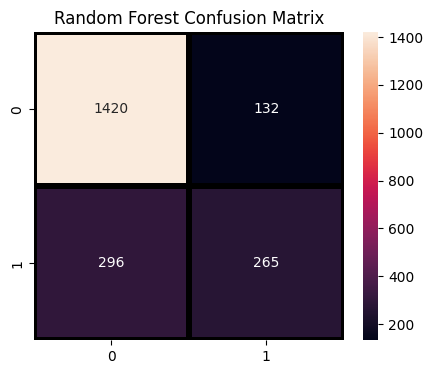

In [102]:
# Confusion Matrix
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred_rf),
           annot=True, fmt="d", linecolor="k", linewidths=3
           )
plt.title("Random Forest Confusion Matrix", fontsize=12)
plt.show()

AUC for Random Forest: 0.8414913997464027


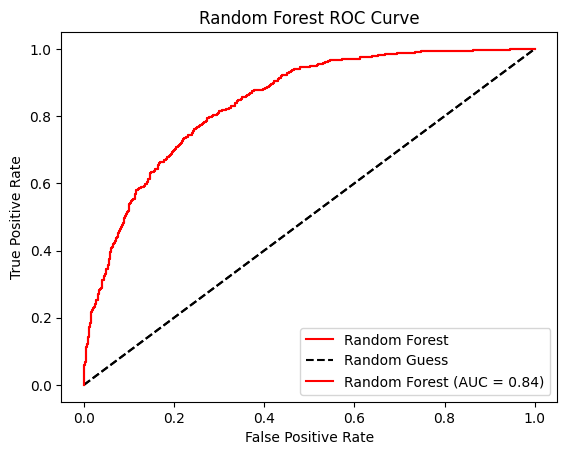

In [103]:
y_rfpred_prob = model_rf.predict_proba(X_test)[:,1]
fpr_rf, tpr_rf, thresholds = roc_curve(y_test, y_rfpred_prob)
plt.plot([0, 1], [0, 1], 'k--' )
plt.plot(fpr_rf, tpr_rf, label='Random Forest',color = "r")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC Curve',fontsize=12)

auc_rf = roc_auc_score(y_test, y_rfpred_prob)
print(f'AUC for Random Forest: {auc_rf}')

plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_rf:.2f})', color='r')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC Curve', fontsize=12)
plt.legend(loc='lower right')
plt.show()

<a id="105"></a>
#### <b> 4. Decision Tree Classifer </b>
<a id="lr"></a>

In [104]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
accuracy_dt = dt_model.score(X_test, y_test)
print("Dicision Tree Accuracy is :", accuracy_dt)

Dicision Tree Accuracy is : 0.7378135352579271


In [105]:
# Classification Report
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       0.82      0.82      0.82      1552
           1       0.51      0.51      0.51       561

    accuracy                           0.74      2113
   macro avg       0.66      0.67      0.66      2113
weighted avg       0.74      0.74      0.74      2113



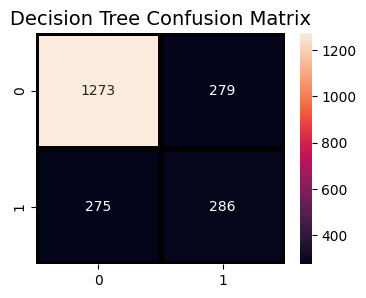

In [106]:
# Confusion matrix
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, y_pred_dt),
           annot=True, fmt="d", linecolor='k', linewidths=3
           )
plt.title("Decision Tree Confusion Matrix", fontsize=14)
plt.show()


AUC: 0.6650179401657569


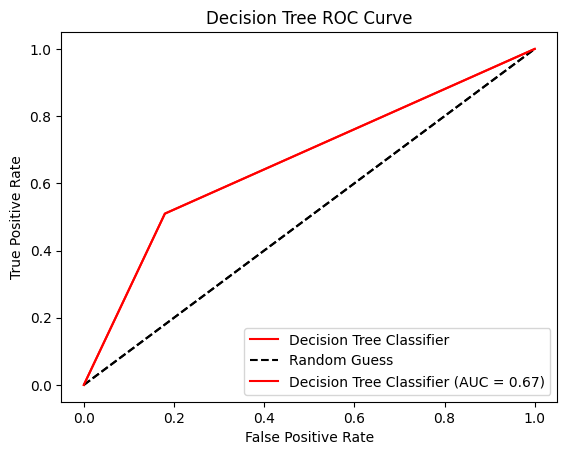

In [107]:
# ROC Curve
y_pred_prob = dt_model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test,y_pred_prob)
plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr, tpr, label='Decision Tree Classifier', color='r')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Decision Tree ROC Curve', fontsize=12)

from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, y_pred_prob)
print(f'AUC: {auc}')

plt.plot([0,1], [0,1], 'k--', label='Random Guess')
plt.plot(fpr, tpr, label=f'Decision Tree Classifier (AUC = {auc:.2f})', color='r')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Decision Tree ROC Curve', fontsize=12)
plt.legend(loc='lower right')
plt.show()

ROC Curve showing the performance is not good!

In [108]:
non_churn_actual = 1397+152  # Model predicts 1397 as non churn (right prediction); 152 as churn of them (wrong prediction)
non_churn_actual

1549

In [109]:
churn_actual = 237+324  # While Model/algorithm predicts 237 as non churn(wrong prediction); and 324 of them as Churn (Right Prediction) 
churn_actual

561

In [110]:
# Model Right Predictions
model_correct_pred = 1397+324
# Model wrong Predictions
model_wrong_pred = 152+237

print(model_correct_pred)
print(model_wrong_pred)

1721
389


In [111]:
# Classification reports for each classifier
knn_report = classification_report(y_test, y_pred_knn)
svc_report = classification_report(y_test, y_pred_svc)
rf_report = classification_report(y_test, y_pred_rf)
dt_report = classification_report(y_test, y_pred_dt)

# Print comparison table
print("KNN")
print(knn_report)
print()
print("SVC")
print(svc_report)
print()
print("Random Forest")
print(rf_report)
print()
print("Decision Tree")
print(dt_report)


KNN
              precision    recall  f1-score   support

           0       0.73      0.96      0.83      1552
           1       0.23      0.04      0.06       561

    accuracy                           0.71      2113
   macro avg       0.48      0.50      0.45      2113
weighted avg       0.60      0.71      0.63      2113


SVC
              precision    recall  f1-score   support

           0       0.73      1.00      0.85      1552
           1       0.00      0.00      0.00       561

    accuracy                           0.73      2113
   macro avg       0.37      0.50      0.42      2113
weighted avg       0.54      0.73      0.62      2113


Random Forest
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1552
           1       0.67      0.47      0.55       561

    accuracy                           0.80      2113
   macro avg       0.75      0.69      0.71      2113
weighted avg       0.79      0.80      0.79      2

In [114]:
performance_metrics = {
    "Algorithm": ["KNN", "SVM", "Random Forest", "Decision Tree"],
    "Accuracy": [0.7117841930903928, 0.73450070989115, 0.7974443918599148, 0.7378135352579271],
    "Precision_0": [0.73, 0.73, 0.83, 0.82],
    "Precision_1": [0.23, 0.00, 0.67, 0.51],
    "Recall_0": [0.96, 1.00, 0.91, 0.82],
    "Recall_1": [0.04, 0.00, 0.47, 0.51],
    "F1-score_0": [0.83, 0.85, 0.87, 0.82],
    "F1-score_1": [0.06, 0.00, 0.55, 0.51],
    "Support": [1552, 1552, 1552, 1552],
    "AUC": [0.4965876931841153, 0.6742952569968944, 0.8414913997464027, 0.6650179401657569]
}

# Convert the dictionary to a DataFrame
df = pd.DataFrame(performance_metrics)

# Display the DataFrame
print(df)


       Algorithm  Accuracy  Precision_0  Precision_1  Recall_0  Recall_1   
0            KNN  0.711784         0.73         0.23      0.96      0.04  \
1            SVM  0.734501         0.73         0.00      1.00      0.00   
2  Random Forest  0.797444         0.83         0.67      0.91      0.47   
3  Decision Tree  0.737814         0.82         0.51      0.82      0.51   

   F1-score_0  F1-score_1  Support       AUC  
0        0.83        0.06     1552  0.496588  
1        0.85        0.00     1552  0.674295  
2        0.87        0.55     1552  0.841491  
3        0.82        0.51     1552  0.665018  


In [112]:
import pandas as pd
from sklearn.metrics import classification_report

# Define true labels and predicted labels for each classifier
# Replace these with your actual data
y_true = y_test


# Generate classification reports for each classifier
knn_report = classification_report(y_true, y_pred_knn, output_dict=True)
svc_report = classification_report(y_true, y_pred_svc, output_dict=True)
rf_report = classification_report(y_true, y_pred_rf, output_dict=True)
dt_report = classification_report(y_true, y_pred_dt, output_dict=True)

# Create a DataFrame to store the classification report metrics
metrics_df = pd.DataFrame({
    "KNN": knn_report["1"],
    "SVC": svc_report["1"],
    "Random Forest": rf_report["1"],
    "Decision Tree": dt_report["1"]
})

# Transpose the DataFrame for better readability
metrics_df = metrics_df.T

# Print the DataFrame
print(metrics_df)


               precision    recall  f1-score  support
KNN             0.233333  0.037433  0.064516    561.0
SVC             0.000000  0.000000  0.000000    561.0
Random Forest   0.667506  0.472371  0.553236    561.0
Decision Tree   0.506195  0.509804  0.507993    561.0


### Suggestions

- Customer Churning in considered to be bad for any organizational profitability & goodwill
- There are numbers of ways to eliminate this churning & here some tips has be shared below:

1. Properly Know & Monitor your customers
2. Develop KYC 
3. Properly identify the key risks factory that may causes of your customer churning, including idenfying factors and continously improve it
4. Engage in customer satisfaction process ( good serice, quality, commitments, sell sevice over selling goods
5. Regular monitoring
6. Exit interview / survey who already churned